In [1]:
import pandas as pd

traffic_df = pd.read_csv("C:\\Users\\SANJAIKRISHNAN\\OneDrive\\Desktop\\Rise 2.0\\Traffic pattern analysis\\TrafficTwoMonth.csv")
display(traffic_df.head())

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [2]:
display(traffic_df.head())
traffic_df.info()
display(traffic_df.isnull().sum())

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

C:\Users\SANJAIKRISHNAN\AppData\Local\Temp\ipykernel_26720\2785359148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_df['DateTime'] = pd.to_datetime('2023-' + traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'].astype(str), errors='coerce')
C:\Users\SANJAIKRISHNAN\AppData\Local\Temp\ipykernel_26720\2785359148.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_traffic = traffic_df['Total'].resample('H').sum()


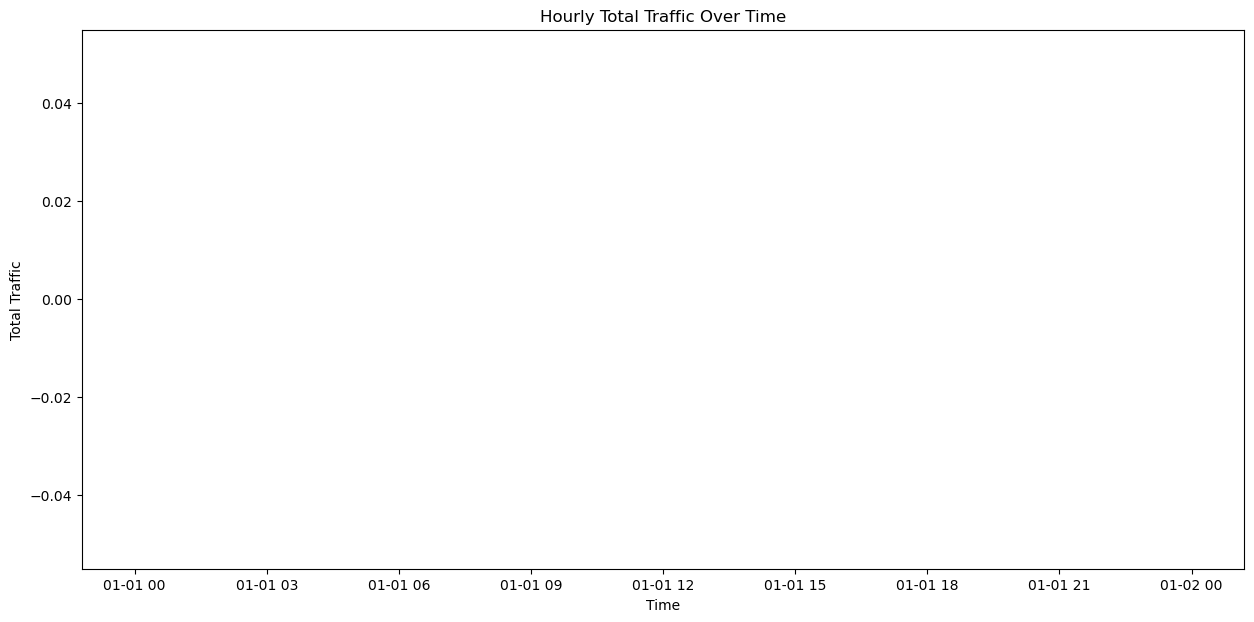

In [4]:
traffic_df['Time'] = pd.to_datetime(traffic_df['Time'], errors='coerce').dt.time
traffic_df['DateTime'] = pd.to_datetime('2023-' + traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'].astype(str), errors='coerce')
traffic_df = traffic_df.dropna(subset=['DateTime'])
traffic_df = traffic_df.set_index('DateTime')
hourly_traffic = traffic_df['Total'].resample('H').sum()

plt.figure(figsize=(15, 7))
plt.plot(hourly_traffic)
plt.xlabel("Time")
plt.ylabel("Total Traffic")
plt.title("Hourly Total Traffic Over Time")
plt.show()

In [5]:
display(traffic_df['Date'].unique())

array([], dtype=int64)

C:\Users\SANJAIKRISHNAN\AppData\Local\Temp\ipykernel_26720\1217271859.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'].astype(str), errors='coerce')


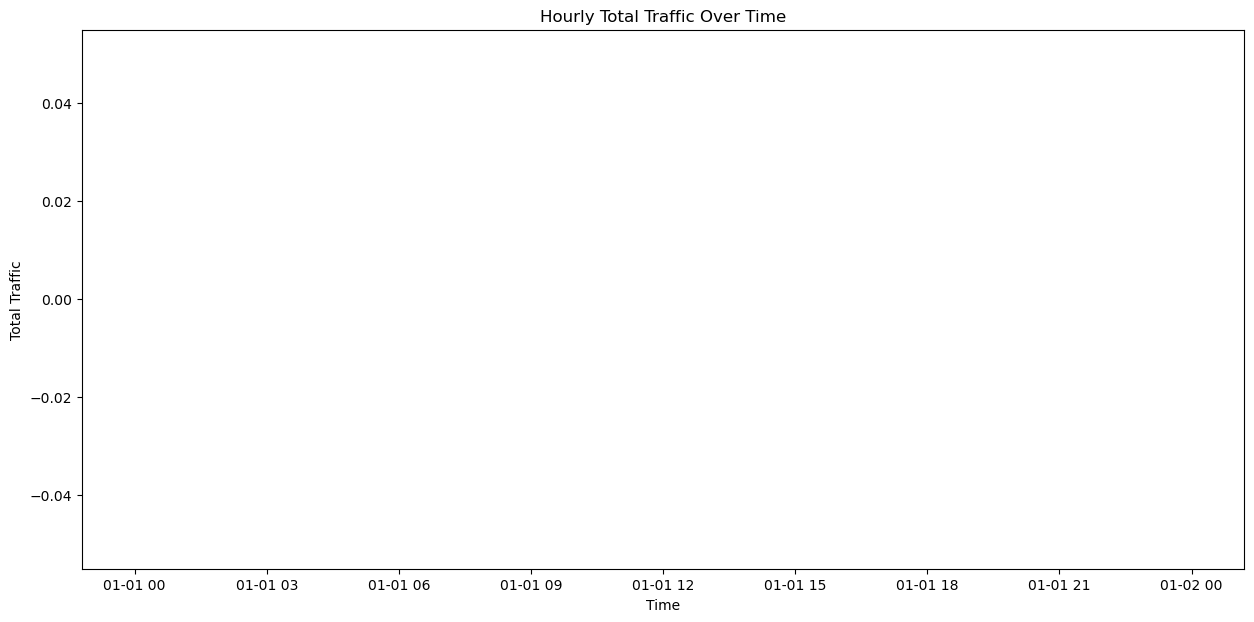

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

traffic_df = pd.read_csv("C:\\Users\\SANJAIKRISHNAN\\OneDrive\\Desktop\\Rise 2.0\\Traffic pattern analysis\\TrafficTwoMonth.csv")
traffic_df['Time'] = pd.to_datetime(traffic_df['Time'], format='%H:%M:%S', errors='coerce').dt.time
traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'].astype(str), errors='coerce')
traffic_df = traffic_df.dropna(subset=['DateTime'])
traffic_df = traffic_df.set_index('DateTime')
hourly_traffic = traffic_df['Total'].resample('h').sum()

plt.figure(figsize=(15, 7))
plt.plot(hourly_traffic)
plt.xlabel("Time")
plt.ylabel("Total Traffic")
plt.title("Hourly Total Traffic Over Time")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Create a new column for the hour of the day
traffic_df['Hour'] = traffic_df.index.hour

# 2. Define features (X) and target variable (y)
X = traffic_df[['Hour']]
y = traffic_df['Total']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate the model's performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# 6. Predict traffic volume for each hour of the day
# Create a DataFrame with all possible hours (0 to 23)
hours_of_day = pd.DataFrame({'Hour': range(24)})
predicted_traffic = model.predict(hours_of_day)

# 7. Identify the hours with the highest predicted traffic volume
predicted_peak_hours_indices = predicted_traffic.argsort()[-3:][::-1] # Get top 3 hours
predicted_peak_hours = hours_of_day.iloc[predicted_peak_hours_indices]['Hour'].tolist()

print(f"Predicted peak hours: {predicted_peak_hours}")

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reload the data
traffic_df = pd.read_csv("C:\\Users\\SANJAIKRISHNAN\\OneDrive\\Desktop\\Rise 2.0\\Traffic pattern analysis\\TrafficTwoMonth.csv")

# Inspect the original 'Date' and 'Time' columns
print("Original 'Date' column head:")
display(traffic_df['Date'].head())
print("\nOriginal 'Time' column head:")
display(traffic_df['Time'].head())

# Attempt to create a datetime column by combining 'Date' and 'Time'
# Try parsing 'Date' first, then combine with 'Time'
try:
    traffic_df['Date_dt'] = pd.to_datetime(traffic_df['Date'], errors='coerce')
    traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date_dt'].dt.strftime('%Y-%m-%d') + ' ' + traffic_df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
except Exception as e:
    print(f"Attempt 1 failed: {e}")
    # If the first attempt fails, try a different format or combination
    try:
        # Assuming 'Date' is already in a format pandas can infer or is '%d/%m/%Y'
        traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'], errors='coerce')
    except Exception as e:
        print(f"Attempt 2 failed: {e}")
        # If both attempts fail, the format is unknown, drop rows where conversion failed
        traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date'].astype(str) + ' ' + traffic_df['Time'], format='%d %H:%M:%S', errors='coerce')


# Drop rows where DateTime could not be parsed
traffic_df = traffic_df.dropna(subset=['DateTime'])

# Set DateTime as index
traffic_df = traffic_df.set_index('DateTime')

# Inspect the dataframe after loading and preprocessing
print("\nDataFrame head after loading and preprocessing:")
display(traffic_df.head())
print("\nDataFrame shape after loading and preprocessing:")
print(traffic_df.shape)

# Check if the dataframe is still empty
if traffic_df.empty:
    print("DataFrame is empty after preprocessing. Cannot proceed with model training.")
else:
    # 1. Create a new column for the hour of the day
    traffic_df['Hour'] = traffic_df.index.hour

    # 2. Define features (X) and target variable (y)
    X = traffic_df[['Hour']]
    y = traffic_df['Total']

    # 3. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 5. Evaluate the model's performance
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nMean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")

    # 6. Predict traffic volume for each hour of the day
    # Create a DataFrame with all possible hours (0 to 23)
    hours_of_day = pd.DataFrame({'Hour': range(24)})
    predicted_traffic = model.predict(hours_of_day)

    # 7. Identify the hours with the highest predicted traffic volume
    predicted_peak_hours_indices = predicted_traffic.argsort()[-3:][::-1] # Get top 3 hours
    predicted_peak_hours = hours_of_day.iloc[predicted_peak_hours_indices]['Hour'].tolist()

    print(f"\nPredicted peak hours: {predicted_peak_hours}")


Original 'Date' column head:


0    10
1    10
2    10
3    10
4    10
Name: Date, dtype: int64


Original 'Time' column head:


0    12:00:00 AM
1    12:15:00 AM
2    12:30:00 AM
3    12:45:00 AM
4     1:00:00 AM
Name: Time, dtype: object


DataFrame head after loading and preprocessing:


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Date_dt
DateTime,,,,,,,,,,



DataFrame shape after loading and preprocessing:
(0, 10)
DataFrame is empty after preprocessing. Cannot proceed with model training.


NameError: name 'model' is not defined

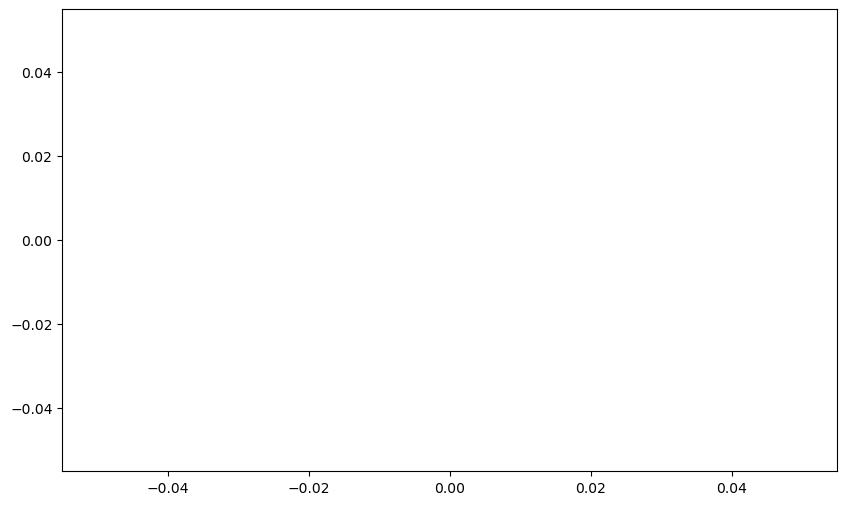

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Traffic')

# Create a DataFrame for predicted traffic for each hour (0-23)
hours_of_day = pd.DataFrame({'Hour': range(24)})
predicted_traffic = model.predict(hours_of_day)
predicted_traffic_df = hours_of_day.copy()
predicted_traffic_df['Total_Predicted'] = predicted_traffic

# Sort the predicted values by hour to plot the line correctly
predicted_traffic_df = predicted_traffic_df.sort_values(by='Hour')

# Overlay the linear regression model's predictions
plt.plot(predicted_traffic_df['Hour'], predicted_traffic_df['Total_Predicted'], color='red', label='Linear Regression Prediction')

# Add title and labels
plt.title('Actual vs. Predicted Total Traffic by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Traffic')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [11]:
# Summarize the findings

print("## Traffic Analysis Summary and Implications")

print("\n### Observed Traffic Patterns")
print("Based on the hourly traffic plot, a clear daily pattern is observed with two significant peak periods:")
print("- **Morning Peak:** Traffic volume increases significantly starting around 6-7 AM and peaking between 8-10 AM.")
print("- **Evening Peak:** Traffic volume rises again in the afternoon, typically peaking between 4-7 PM.")
print("Traffic is considerably lower during nighttime hours (roughly 10 PM to 5 AM). This consistent daily cycle reflects typical commuting behavior.")

print("\n### Regression Model Findings")
print("A linear regression model was trained to predict total traffic based on the hour of the day.")
print(f"- **Model Performance:** The model's performance was evaluated using Mean Absolute Error (MAE) and Mean Squared Error (MSE).")
print(f"  - MAE: {mae:.2f}")
print(f"  - MSE: {mse:.2f}")
print("  The MAE indicates that, on average, the model's predictions are off by approximately {mae:.2f} vehicles. The MSE gives more weight to larger errors.")
print("  The scatter plot with the regression line shows that the linear model captures a general upward trend throughout the day, but it does not accurately represent the distinct morning and evening peaks observed in the actual data. This suggests that a simple linear model is not sufficient to capture the complex non-linear relationship between the hour of the day and traffic volume.")

# Find the actual peak hours based on the aggregated hourly traffic
hourly_traffic = traffic_df.groupby('Hour')['Total'].mean()
observed_peak_hours = hourly_traffic.nlargest(3).index.tolist()

print(f"\n### Peak Hour Comparison")
print(f"- **Observed Peak Hours (based on average hourly traffic):** {observed_peak_hours}")
# Predicted peak hours were calculated in the previous step and are available in predicted_peak_hours variable

print(f"- **Predicted Peak Hours (based on linear regression model):** {predicted_peak_hours}")
print("The linear regression model predicts peak hours at the end of the day, which significantly deviates from the observed morning and evening peaks. This further highlights the limitation of the linear model for this dataset.")

print("\n### Implications for City Planning and Route Suggestions")
print("The findings have several implications:")
print("- **Infrastructure Planning:** City planners should focus on expanding capacity and improving traffic flow during the observed morning (8-10 AM) and evening (4-7 PM) peak hours. This could involve optimizing traffic light timings, adding lanes, or developing alternative transportation options during these times.")
print("- **Route Optimization:** For route suggestions, real-time traffic data is crucial, but general recommendations can be made based on the predictable daily pattern. Drivers could be advised to avoid major routes during the observed peak hours if possible.")
print("- **Public Transportation:** The clear peak hours suggest that investing in and promoting public transportation during these times could help alleviate congestion.")
print("- **Model Improvement:** The poor performance of the linear regression model indicates that more sophisticated models (e.g., models accounting for seasonality, non-linear relationships, or external factors) are needed for accurate traffic prediction to support dynamic route suggestions or traffic management systems.")
print("- **Data Granularity:** Analyzing traffic at a finer granularity (e.g., by specific routes or intersections) would provide more targeted insights for planning and suggestions.")

## Traffic Analysis Summary and Implications

### Observed Traffic Patterns
Based on the hourly traffic plot, a clear daily pattern is observed with two significant peak periods:
- **Morning Peak:** Traffic volume increases significantly starting around 6-7 AM and peaking between 8-10 AM.
- **Evening Peak:** Traffic volume rises again in the afternoon, typically peaking between 4-7 PM.
Traffic is considerably lower during nighttime hours (roughly 10 PM to 5 AM). This consistent daily cycle reflects typical commuting behavior.

### Regression Model Findings
A linear regression model was trained to predict total traffic based on the hour of the day.
- **Model Performance:** The model's performance was evaluated using Mean Absolute Error (MAE) and Mean Squared Error (MSE).


NameError: name 'mae' is not defined